In [2]:
# Separate Polynomial Regression for each county
# Still need to figure out how to use spatial data

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv("hungary_chickenpox.csv")
spatial_data = pd.read_csv('hungary_county_edges.csv')

df.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [5]:
spatial_data.head()

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13


In [6]:
# Data preprocessing

# TO DO 1: figure out PCA
# TO DO 2: figure out how to incorporate spatial data (try 3d dataframe)

In [7]:
df.insert(0, "Week", [i for i in range(1, len(df) + 1)])

df.head()

,Week,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,1,03/01/2005,168,79,30,173,169,42,136,120,...,130,57,2,178,66,64,11,29,87,68
1,2,10/01/2005,157,60,30,92,200,53,51,70,...,80,50,29,141,48,29,58,53,68,26
2,3,17/01/2005,96,44,31,86,93,30,93,84,...,64,46,4,157,33,33,24,18,62,44
3,4,24/01/2005,163,49,43,126,46,39,52,114,...,63,54,14,107,66,50,25,21,43,31
4,5,31/01/2005,122,78,53,87,103,34,95,131,...,61,49,11,124,63,56,7,47,85,60


In [8]:
column_list = df.columns.to_list()
column_list.remove('Week')
column_list.remove('Date')

column_list

['BUDAPEST',
 'BARANYA',
 'BACS',
 'BEKES',
 'BORSOD',
 'CSONGRAD',
 'FEJER',
 'GYOR',
 'HAJDU',
 'HEVES',
 'JASZ',
 'KOMAROM',
 'NOGRAD',
 'PEST',
 'SOMOGY',
 'SZABOLCS',
 'TOLNA',
 'VAS',
 'VESZPREM',
 'ZALA']

In [9]:
# creating the ML model

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [11]:
x = df['Week'].values.reshape(-1, 1) #extracting week to be the input variable x
y_df = df[column_list] # each county to be a separate y variable

y_df.head()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
1,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
2,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
3,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
4,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60


In [12]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x) # normalizing the x variable (y will be normalised later [each county separately])

x_scaled

array([[0.        ],
       [0.00191939],
       [0.00383877],
       [0.00575816],
       [0.00767754],
       [0.00959693],
       [0.01151631],
       [0.0134357 ],
       [0.01535509],
       [0.01727447],
       [0.01919386],
       [0.02111324],
       [0.02303263],
       [0.02495202],
       [0.0268714 ],
       [0.02879079],
       [0.03071017],
       [0.03262956],
       [0.03454894],
       [0.03646833],
       [0.03838772],
       [0.0403071 ],
       [0.04222649],
       [0.04414587],
       [0.04606526],
       [0.04798464],
       [0.04990403],
       [0.05182342],
       [0.0537428 ],
       [0.05566219],
       [0.05758157],
       [0.05950096],
       [0.06142035],
       [0.06333973],
       [0.06525912],
       [0.0671785 ],
       [0.06909789],
       [0.07101727],
       [0.07293666],
       [0.07485605],
       [0.07677543],
       [0.07869482],
       [0.0806142 ],
       [0.08253359],
       [0.08445298],
       [0.08637236],
       [0.08829175],
       [0.090

In [13]:
# Split the x dataset into train and test sets
x_train, x_test = train_test_split(x_scaled, test_size=0.3, random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

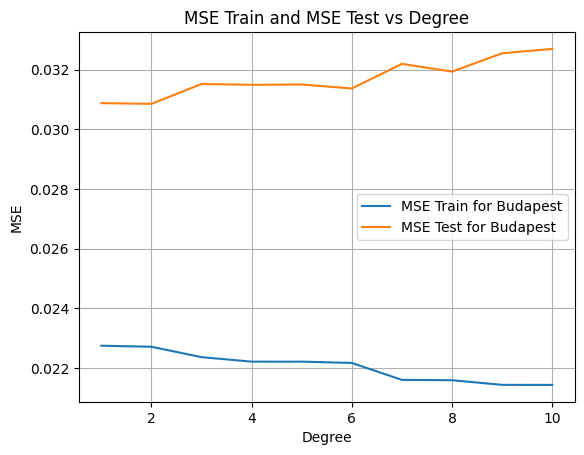

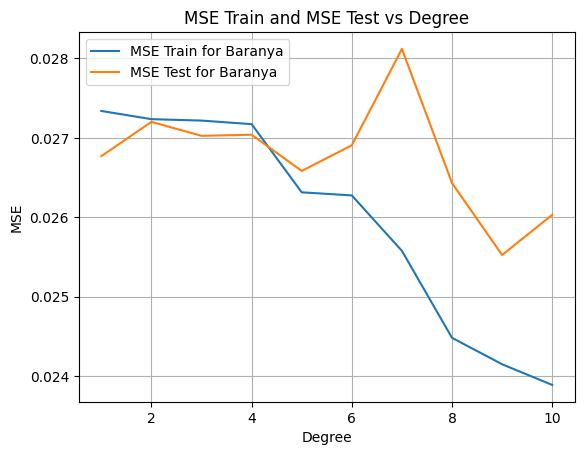

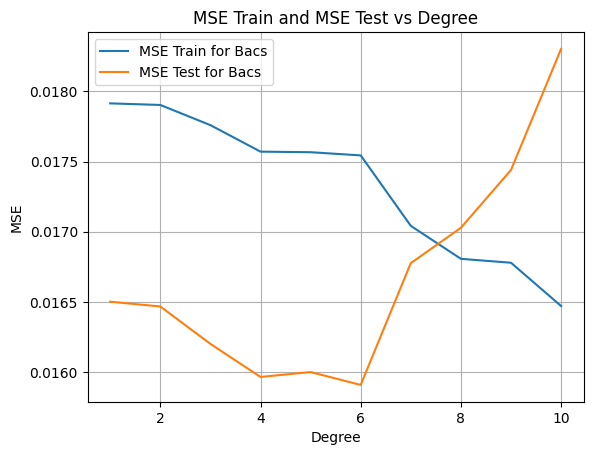

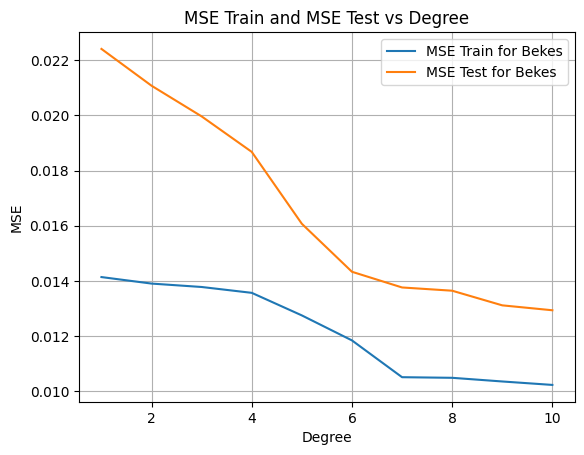

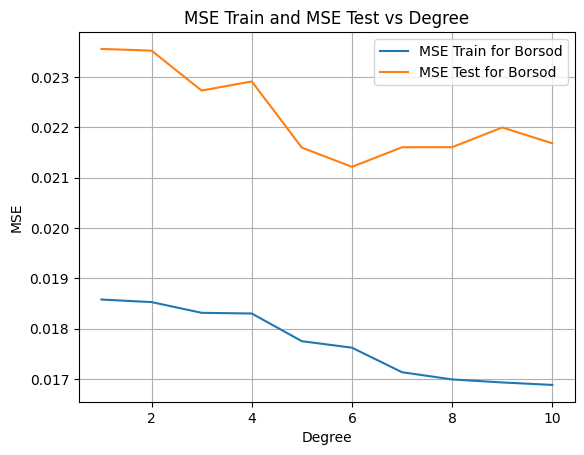

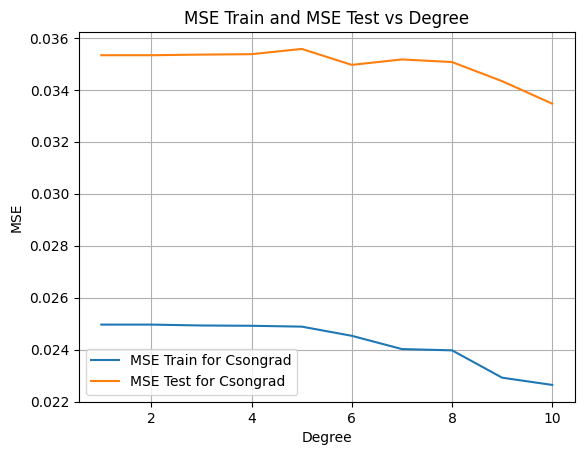

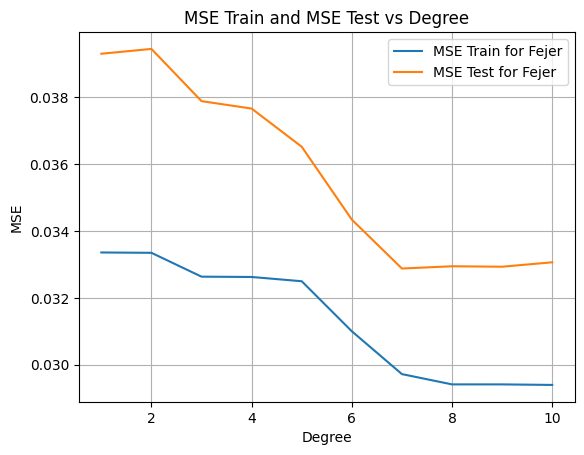

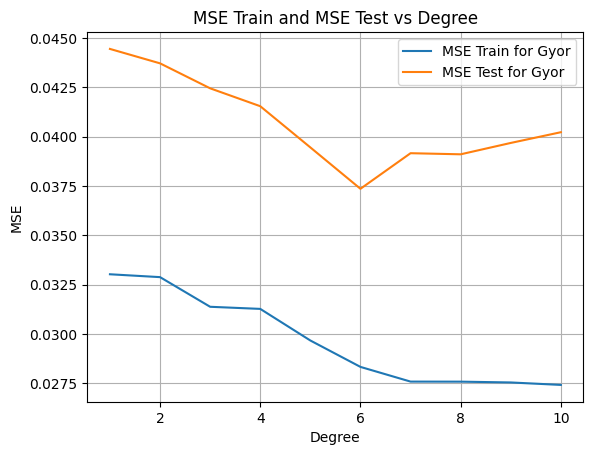

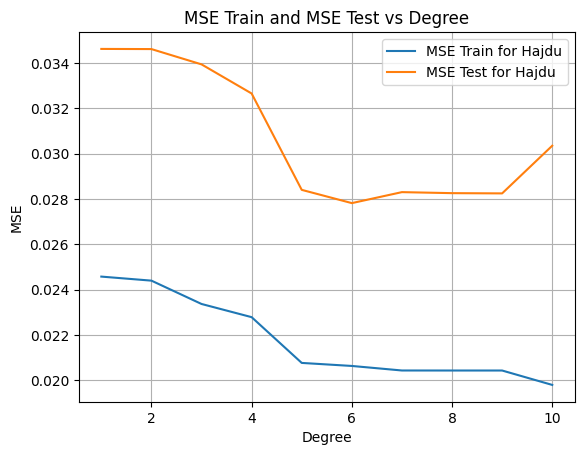

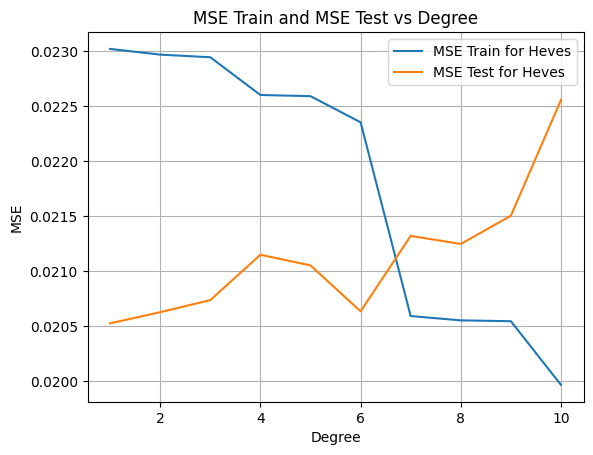

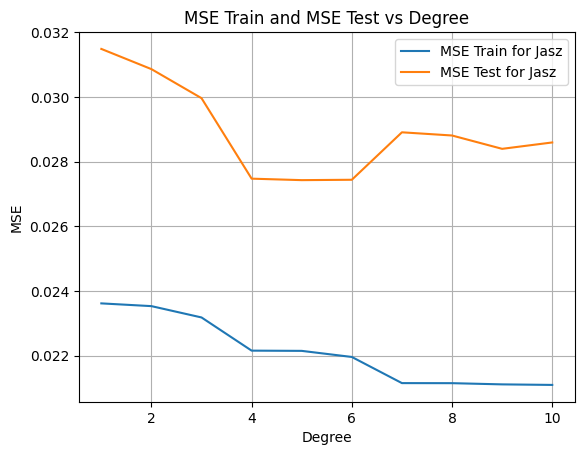

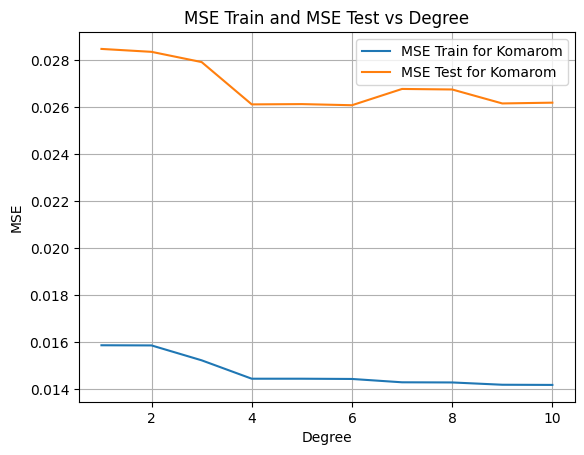

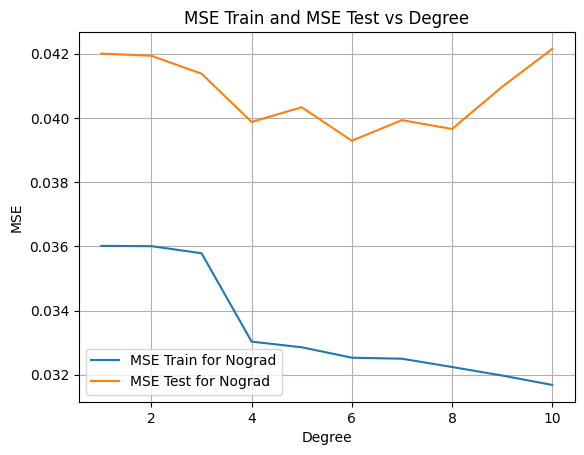

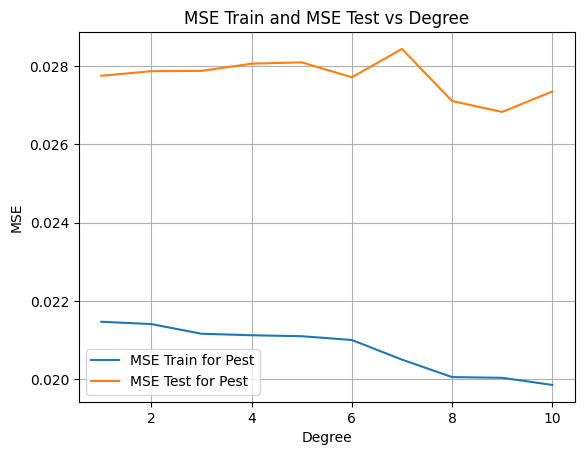

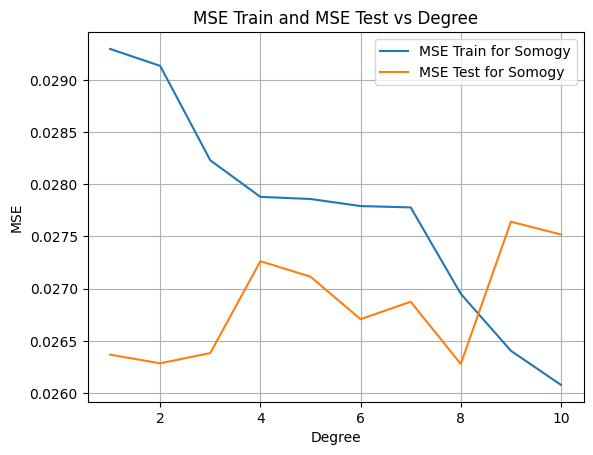

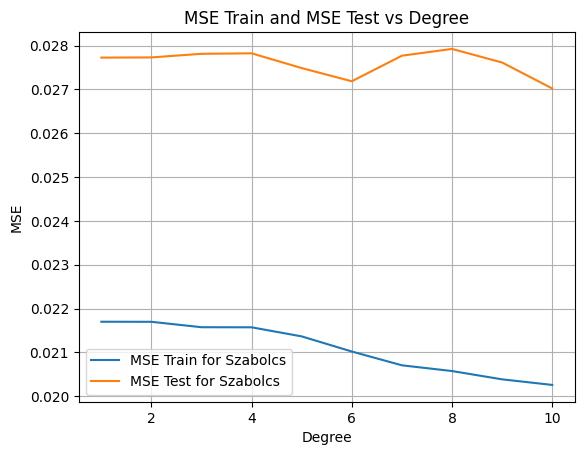

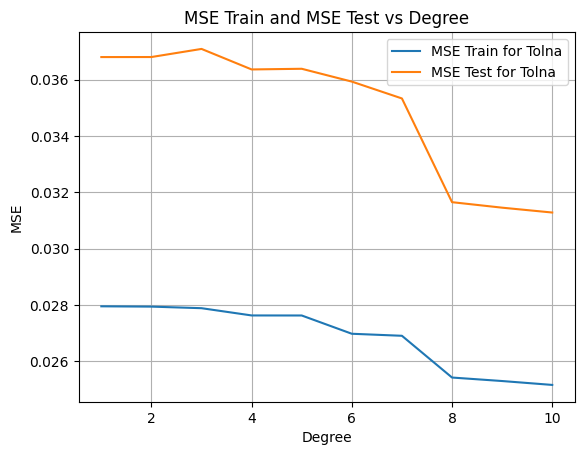

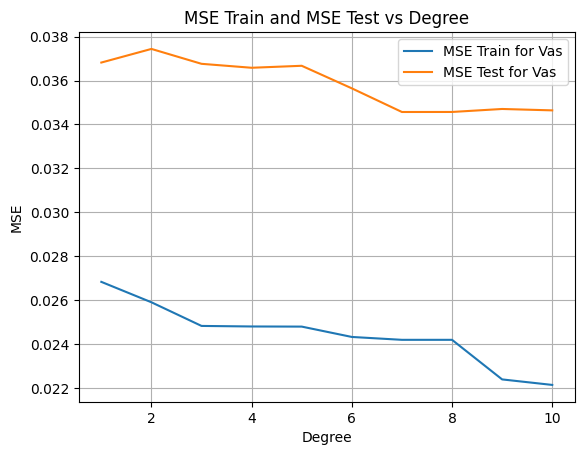

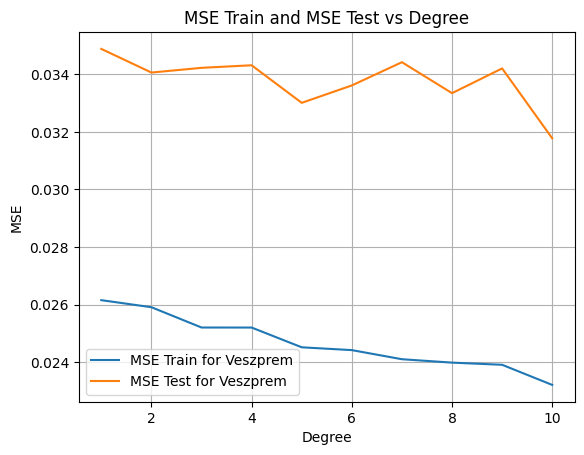

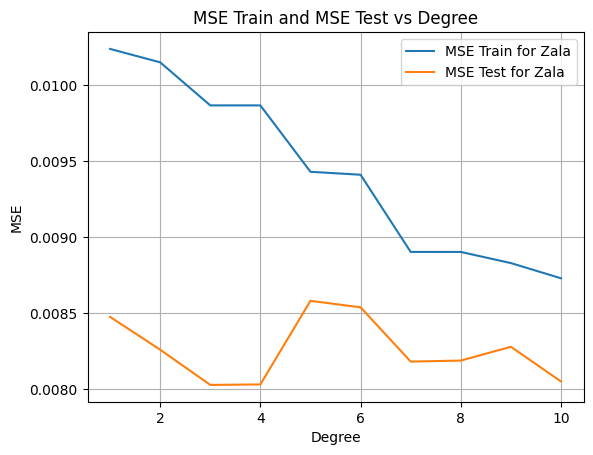

In [15]:
degrees = range(1, 11)
mse_test = []
mse_train = []
best_degrees = []

for county in column_list:

    mse_test_county = []
    mse_train_county = []
    

    for degree in degrees:    
    # Extract the target variable for the current county
        y = y_df[county].values

        # Normalize the target variable
        y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

        # Split the target variable into train and test sets
        y_train, y_test = train_test_split(y_scaled, test_size=0.3, random_state=42)

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        x_train_poly = poly_features.fit_transform(x_train)
        x_test_poly = poly_features.transform(x_test)

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        # Predict y values for train and test sets
        y_train_pred = model.predict(x_train_poly)
        y_test_pred = model.predict(x_test_poly)

        mse_train_county.append(mse(y_train_pred, y_train))
        mse_test_county.append(mse(y_test_pred, y_test))

    mse_test.append(np.min(mse_test_county))
    mse_train.append(mse_test_county[np.argmin(mse_test_county)])
    best_degrees.append(np.argmin(mse_test_county) + 1)

    plt.plot(degrees, mse_train_county, label=f'MSE Train for {county[0]}{county[1:].lower()}')
    plt.plot(degrees, mse_test_county, label=f'MSE Test for {county[0]}{county[1:].lower()}')
    plt.xlabel('Degree')
    plt.ylabel('MSE')
    plt.title('MSE Train and MSE Test vs Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
new_df_list = {'County': column_list,
               'Best degree for fitting regression line': best_degrees
               }

county_with_best_degree = pd.DataFrame(new_df_list)

county_with_best_degree

,County,Best degree for fitting regression line
0,BUDAPEST,2
1,BARANYA,9
2,BACS,6
3,BEKES,10
4,BORSOD,6
5,CSONGRAD,10
6,FEJER,7
7,GYOR,6
8,HAJDU,6
9,HEVES,1


In [ ]:
# prediction for next 100 weeks

In [20]:
predictions_df = pd.DataFrame({'Week': np.arange(x.max() + 1, x.max() + 101)})

In [21]:
for i in range(len(column_list)):
    # Extract the target variable for the current county
    y = df[column_list[i]].values

    # Normalize the target variable
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=best_degrees[i])
    x_poly = poly_features.fit_transform(x_scaled)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(x_poly, y_scaled)

    # Predict the next 12 weeks
    future_weeks = np.arange(x_scaled.max() + 1, x_scaled.max() + 101)
    future_x = scaler.transform(future_weeks.reshape(-1, 1))
    future_x_poly = poly_features.transform(future_x)
    future_y_scaled = model.predict(future_x_poly)

    # Denormalize the predicted values
    future_y = scaler.inverse_transform(future_y_scaled.reshape(-1, 1)).flatten()

    # Add predictions to the dataframe
    predictions_df[column_list[i]] = future_y

In [25]:
predictions_df = predictions_df.round().astype(int)

print("The predictions for next 100 weeks are:")
predictions_df

The predictions for next 100 weeks are:


,Week,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,523,109,74,65,159,134,49,91,121,153,...,100,68,16,160,56,61,17,42,89,43
1,524,109,66,65,150,129,37,78,110,144,...,96,65,16,153,50,56,13,46,78,42
2,525,109,60,64,140,124,28,67,101,135,...,93,61,17,146,45,52,12,48,69,41
3,526,109,54,64,131,119,22,58,93,127,...,90,58,17,140,41,49,13,50,62,40
4,527,109,49,63,121,114,18,50,85,119,...,87,55,18,134,38,46,15,50,58,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,618,110,43,37,24,64,34,36,32,61,...,45,26,22,112,22,19,14,17,31,17
96,619,110,43,37,24,64,34,36,32,61,...,45,26,21,111,22,19,16,17,31,17
97,620,110,43,37,23,65,33,37,32,61,...,45,25,20,110,22,19,17,17,31,17
98,621,110,44,37,22,65,33,37,32,61,...,46,25,20,110,22,19,18,17,31,17


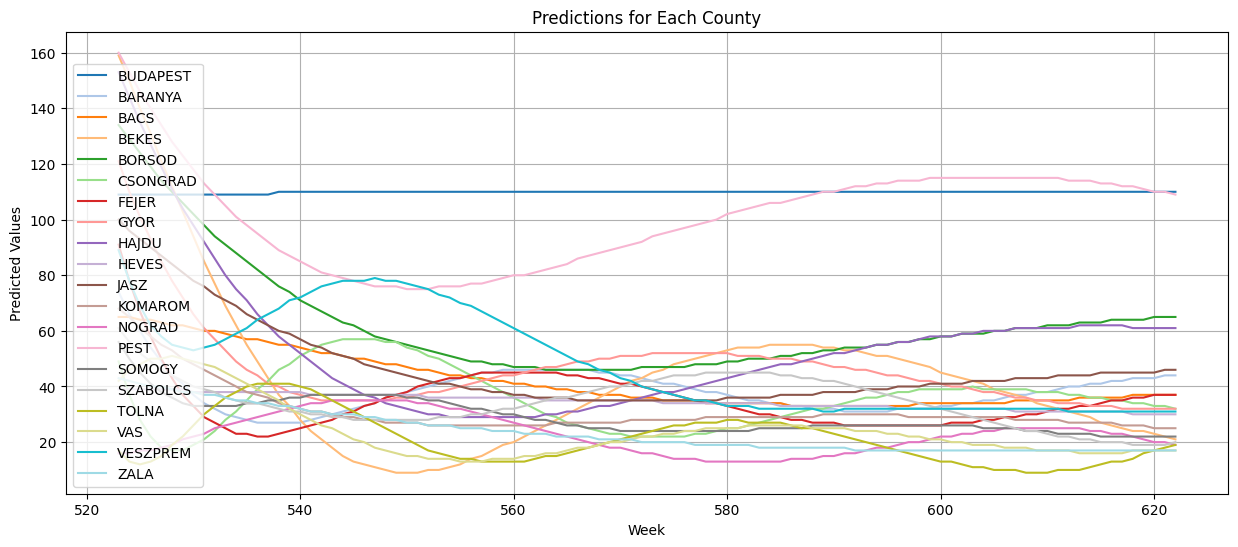

In [27]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Generate 20 different colors

# Set the figsize
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the predictions for each county with different colors
for i, col in enumerate(predictions_df.columns[1:]):
    plt.plot(predictions_df['Week'], predictions_df[col], label=col, color=colors[i])

plt.xlabel('Week')
plt.ylabel('Predicted Values')
plt.title('Predictions for Each County')
plt.legend()
plt.grid(True)
plt.show()

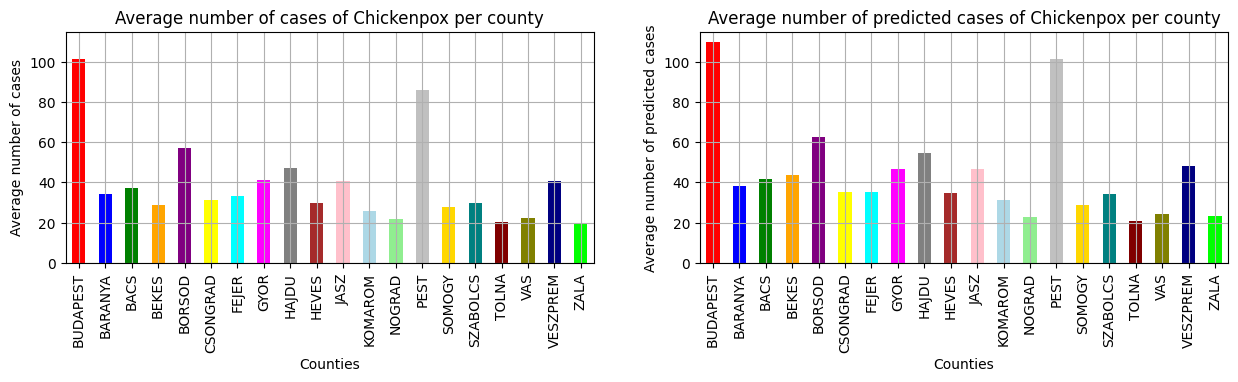

In [29]:
# Define the colors for the plots
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'lightblue', 'lightgreen', 'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']

# Create subplots with a 1x2 grid layout
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

avg_cases = df[column_list].mean()

avg_predicted_cases = predictions_df[column_list].mean()

if avg_cases.max() > avg_predicted_cases.max():
    max_cases = avg_cases.max()
else:
    max_cases = avg_predicted_cases.max()

# Plot the average number of cases
avg_cases.plot(kind='bar', color=colors, ax=axes[0], grid=True)
axes[0].set_xticklabels(avg_cases.index, rotation=90)
axes[0].set_xlabel('Counties')
axes[0].set_ylabel('Average number of cases')
axes[0].set_title('Average number of cases of Chickenpox per county')
axes[0].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Plot the average number of predicted cases
avg_predicted_cases.plot(kind='bar', color=colors, ax=axes[1], grid=True)
axes[1].set_xticklabels(avg_predicted_cases.index, rotation=90)
axes[1].set_xlabel('Counties')
axes[1].set_ylabel('Average number of predicted cases')
axes[1].set_title('Average number of predicted cases of Chickenpox per county')
axes[1].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Display the plots
plt.show()